# Data Analytics I 

Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset. 

The objective is to predict the value of prices of the house using the given features. 

In [1]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import matplotlib as mp
import scipy.stats as st
mp.style.use('ggplot')
sns.set(font_scale=1.5)

Housing Values in Suburbs of Boston
The medv variable is the target variable.

Data description
The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

- crim : per capita crime rate by town.

- zn : proportion of residential land zoned for lots over 25,000 sq.ft.

- indus : proportion of non-retail business acres per town.

- chas : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

- nox : nitrogen oxides concentration (parts per 10 million).

- rm : average number of rooms per dwelling.

- age : proportion of owner-occupied units built prior to 1940.

- dis : weighted mean of distances to five Boston employment centres.

- rad : index of accessibility to radial highways.

- tax : full-value property-tax rate per 10000 dollars.

- ptratio : pupil-teacher ratio by town.

- black : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

- lstat : lower status of the population (percent).

- medv : median value of owner-occupied homes in \$1000s.

Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [2]:
data=pd.read_csv('datasets/boston.csv',index_col=0)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [4]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [6]:
def find_outliers_iqr(data,col):
    '''
    Find outlier values in single column data
        data - Series object
    returns
        outliers - List
    '''
    # Q1 - 25% 
    Q1=np.percentile(data[col],25)
    # Q3 - 75%
    Q3=np.percentile(data[col],75)
    IQR=Q3-Q1
    print('Q1 = %.2f\tQ3 = %.2f\tIQR = %.2f'%(Q1,Q3,IQR))
    thresh1=(Q1-(1.5*IQR))
    thresh2=(Q3+(1.5*IQR))
    print('Threshold1 = ',thresh1,'\tThreshold2 = ',thresh2)
    outliers=data.loc[(data[col]<thresh1)]
    outliers=outliers.append(data.loc[(data[col]>thresh2)])
    print('No of outliers based on ',col,' = ',outliers.shape[0])
    #print(outliers[col])
    return outliers

def remove_outliers(data,outliers):
    print('Size of dataframe before removing outliers : ',data.shape)
    n=data.drop(outliers.index)
    print('Size of dataframe after removing outliers : ',n.shape)
    return n

def handle_outliers(data,col):
    outliers=find_outliers_iqr(data,col)
    
    plt.figure(figsize=(8,5))
    sns.histplot(data[col],bins=20)
    plt.title('Histogram of '+col)
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.show()
    plt.figure(figsize=(8,5))
    sns.boxplot(x=data[col])
    plt.show()
    
    # remove outliers
    new_data=remove_outliers(data,outliers)
    
    plt.figure(figsize=(8,5))
    sns.histplot(new_data[col],bins=20)
    plt.title('Histogram of '+col+' after removing outliers')
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.show()
    plt.figure(figsize=(8,5))
    sns.boxplot(x=new_data[col])
    plt.show()
    
    return new_data

Q1 = 17.02	Q3 = 25.00	IQR = 7.98
Threshold1 =  5.0624999999999964 	Threshold2 =  36.962500000000006
No of outliers based on  medv  =  40


/tmp/ipykernel_4442/3961627873.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers=outliers.append(data.loc[(data[col]>thresh2)])


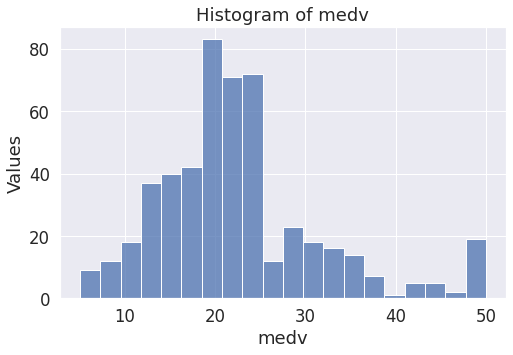

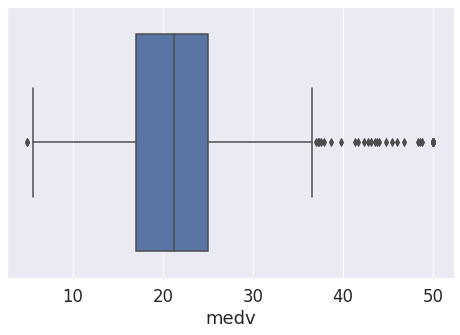

Size of dataframe before removing outliers :  (506, 14)
Size of dataframe after removing outliers :  (466, 14)


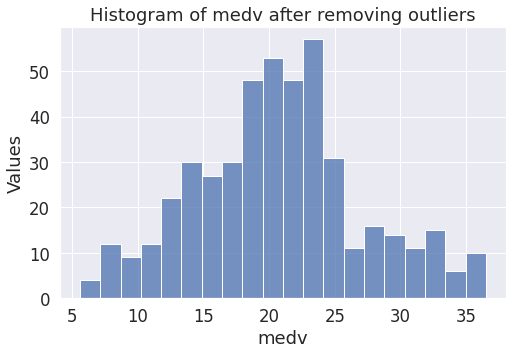

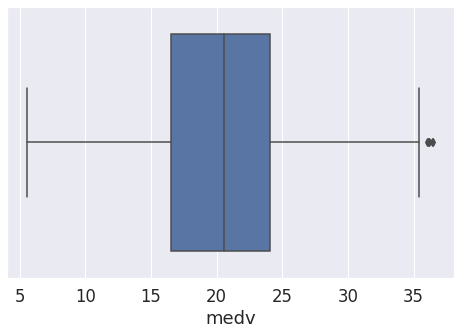

In [7]:
new_data=handle_outliers(data,'medv')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
features=data[data.columns[:-1]].copy(deep=True)
target=data['medv']


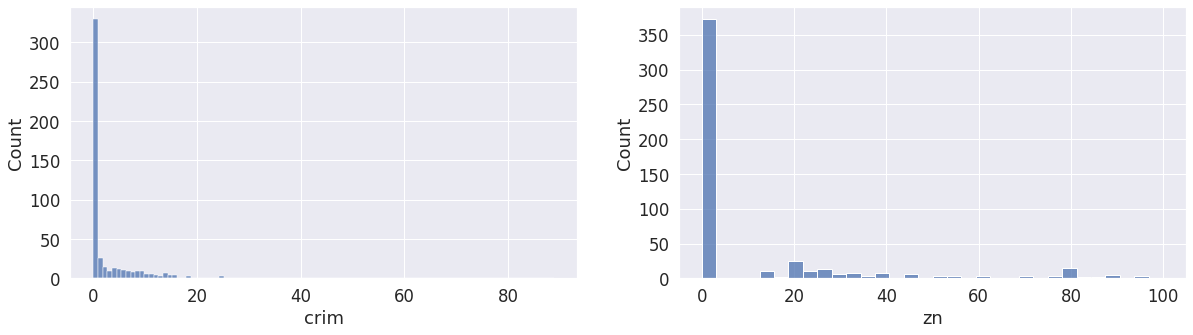

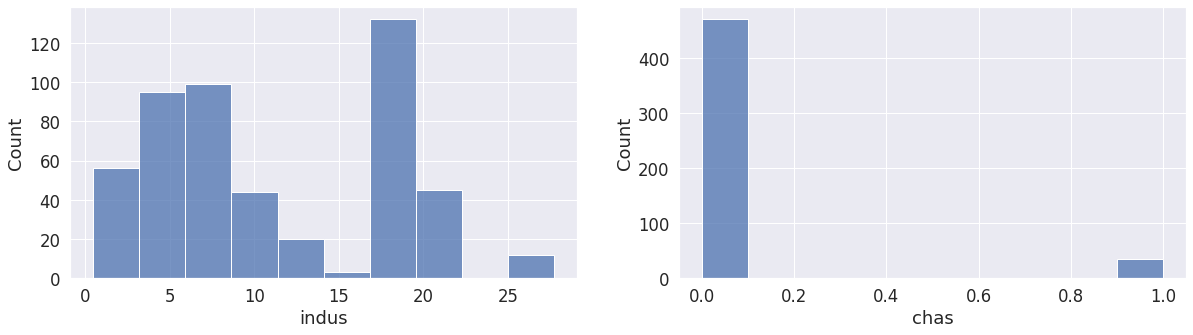

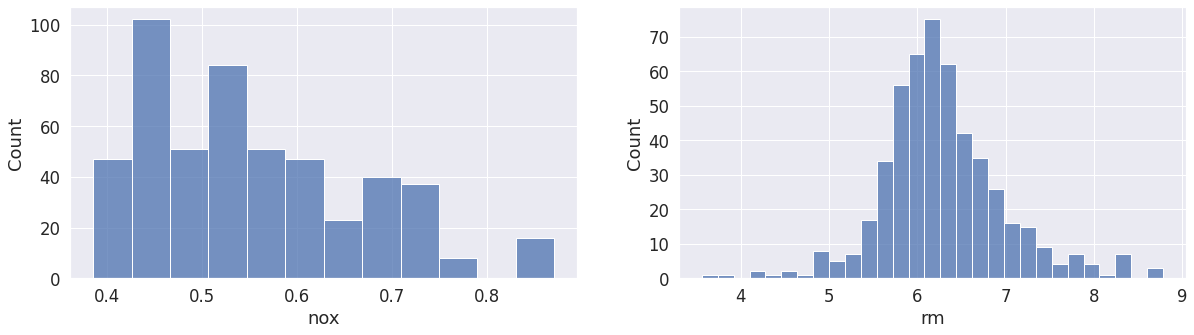

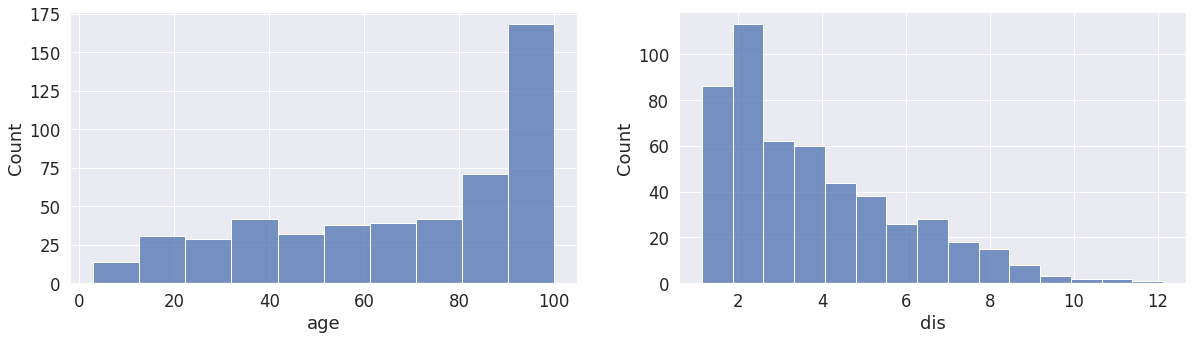

In [10]:
for i in range(0,(features.shape[1]//2)+1,2):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
    sns.histplot(features[features.columns[i]], ax=ax1)
    sns.histplot(features[features.columns[i+1]], ax=ax2)
    plt.show()

### Transforming highly skerwed data with non-negative values greater than zero by taking log

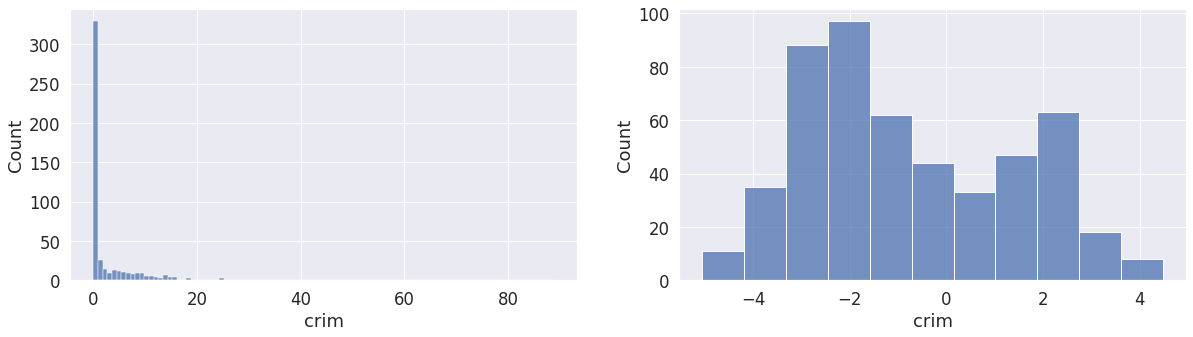

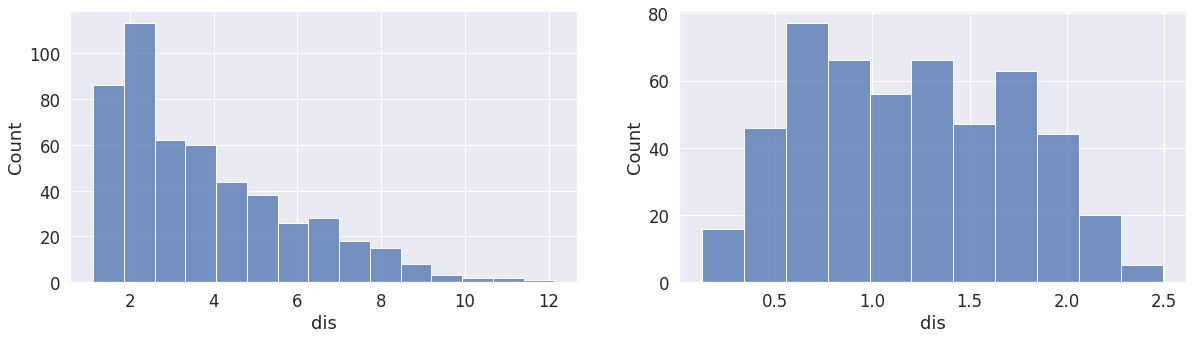

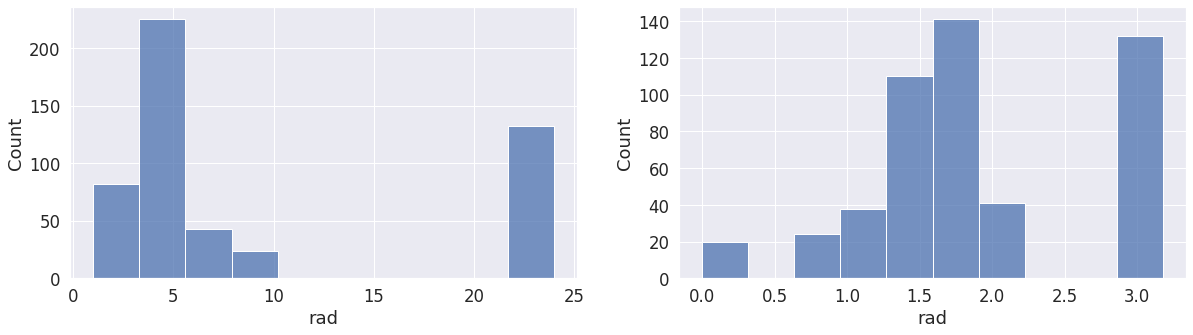

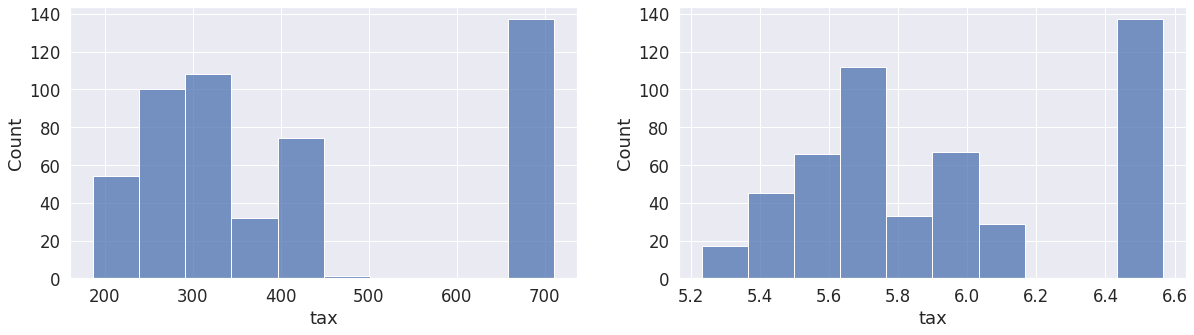

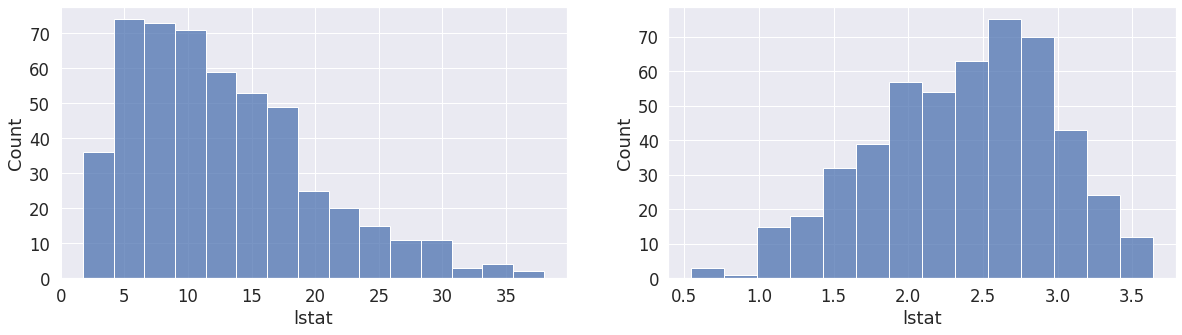

In [11]:
to_transform=['crim','dis','rad','tax','lstat']
for col in to_transform:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
    sns.histplot(features[col], ax=ax1)
    features.loc[:,col]=np.log(data[col])
    sns.histplot(features[col], ax=ax2)
    plt.show()

In [12]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_df,columns=features.columns)
scaled_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-1.983228,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.409104,-2.136989,-0.608739,-1.459000,0.441052,-1.275260
1,-1.305639,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.769562,-1.343886,-1.117412,-0.303094,0.441052,-0.263711
2,-1.305978,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.769562,-1.343886,-1.117412,-0.303094,0.396427,-1.627858
3,-1.226942,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.139194,-0.879950,-1.335255,0.113032,0.416163,-2.153192
4,-0.876187,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.139194,-0.879950,-1.335255,0.113032,0.441052,-1.162114


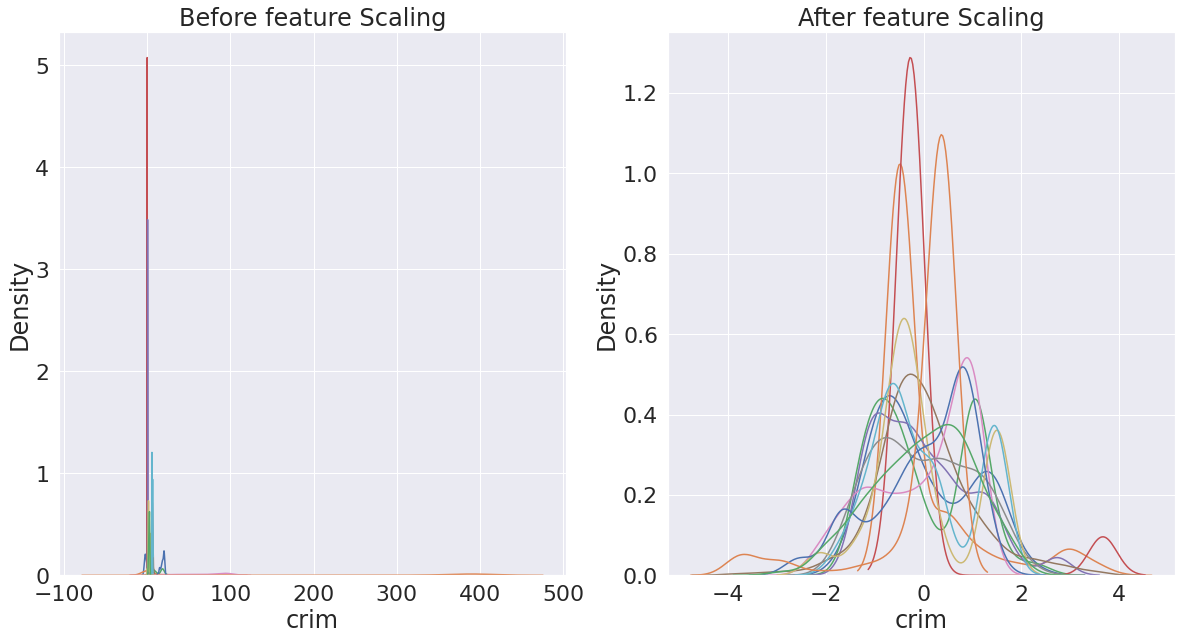

In [13]:
sns.set(font_scale=2)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
ax1.set_title('Before feature Scaling')
ax2.set_title('After feature Scaling')
for feature in features.columns:
    sns.kdeplot(features[feature], ax=ax1)
    sns.kdeplot(scaled_df[feature], ax=ax2)
plt.show()

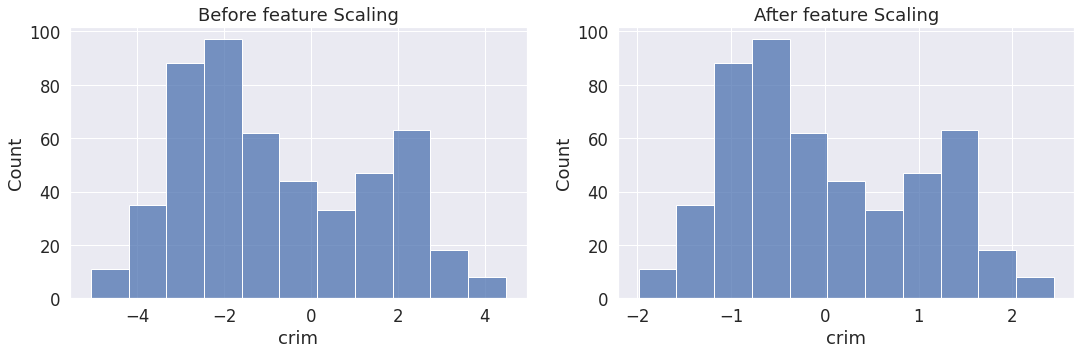

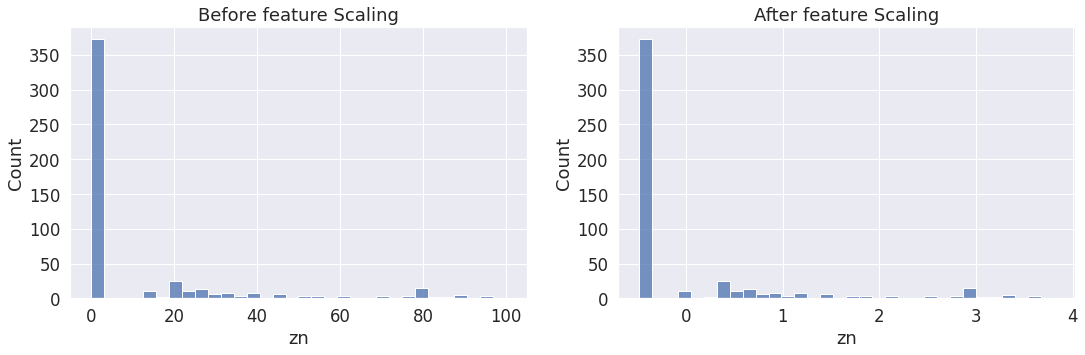

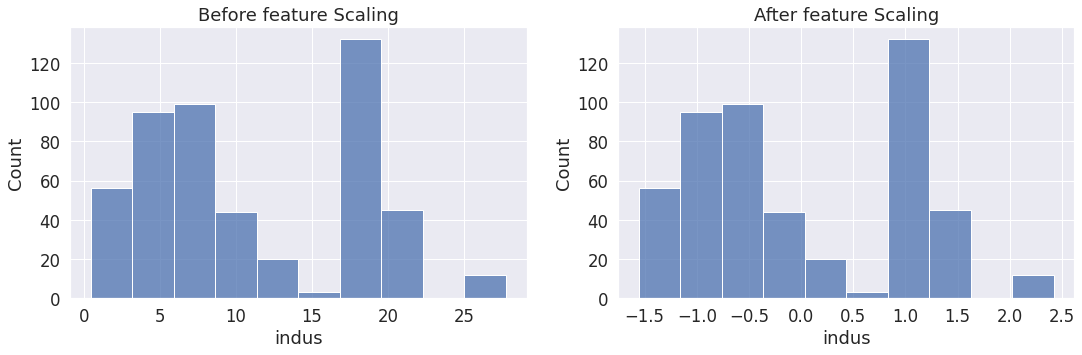

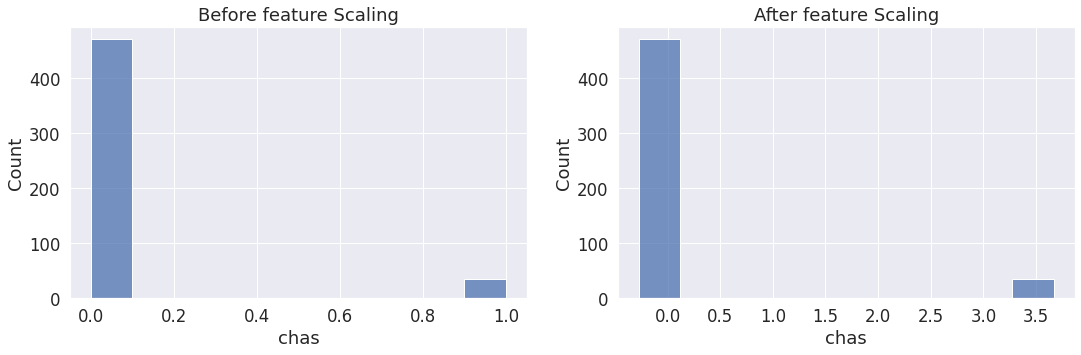

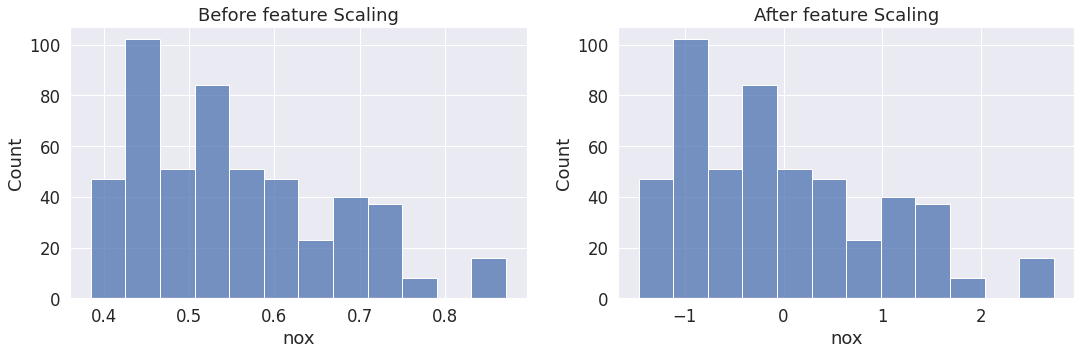

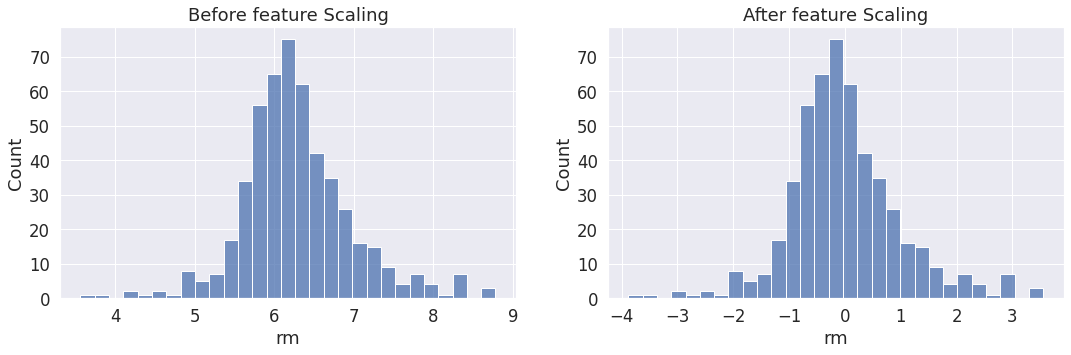

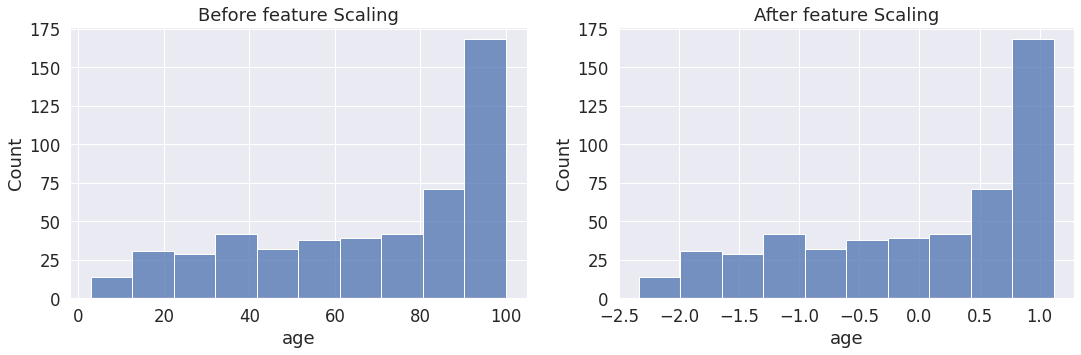

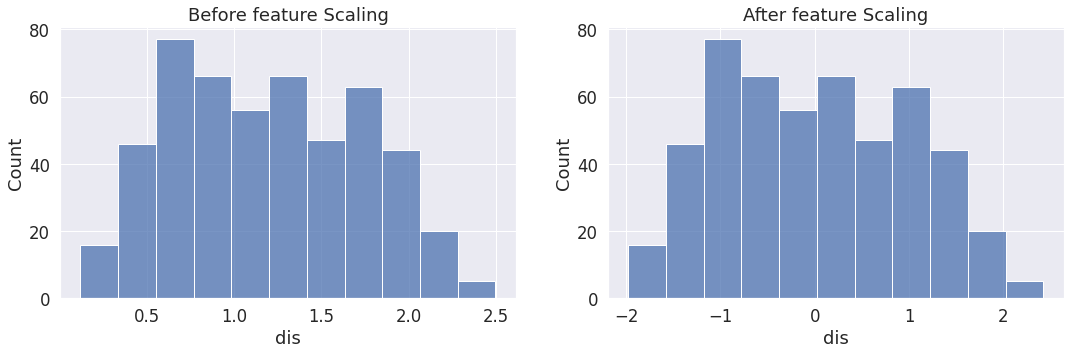

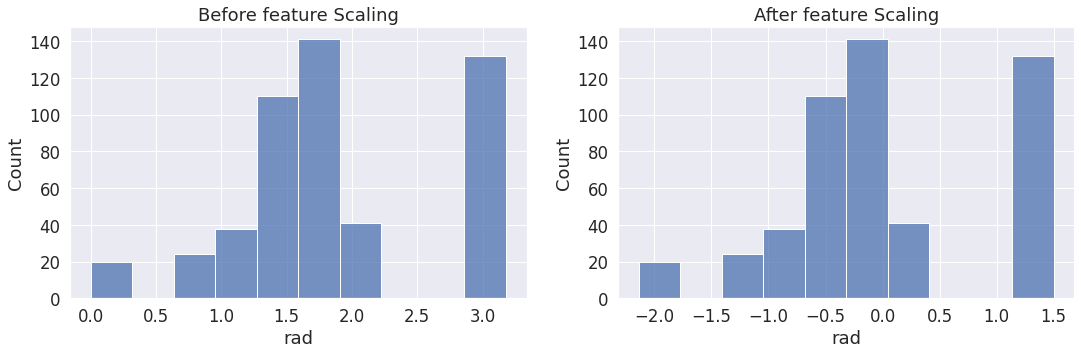

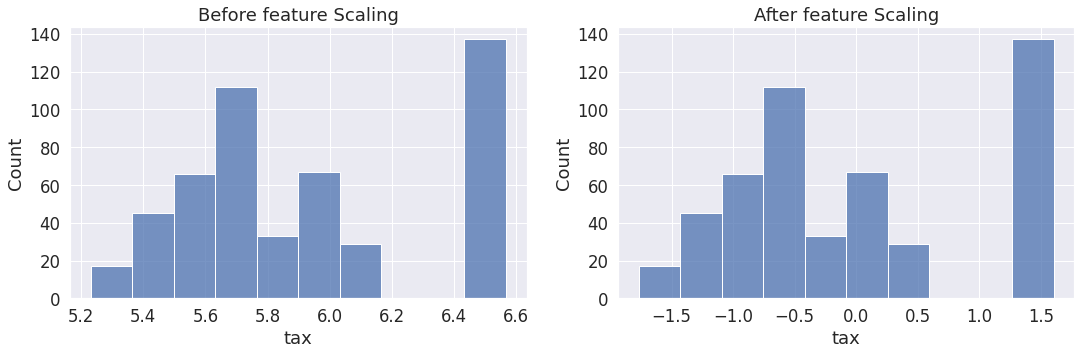

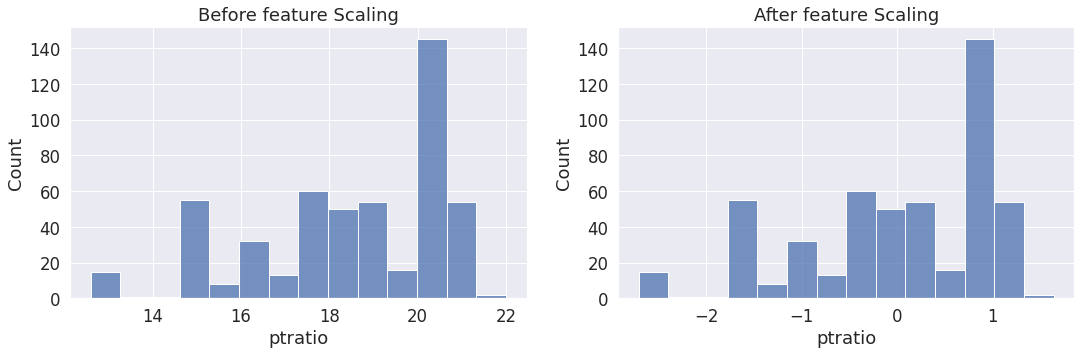

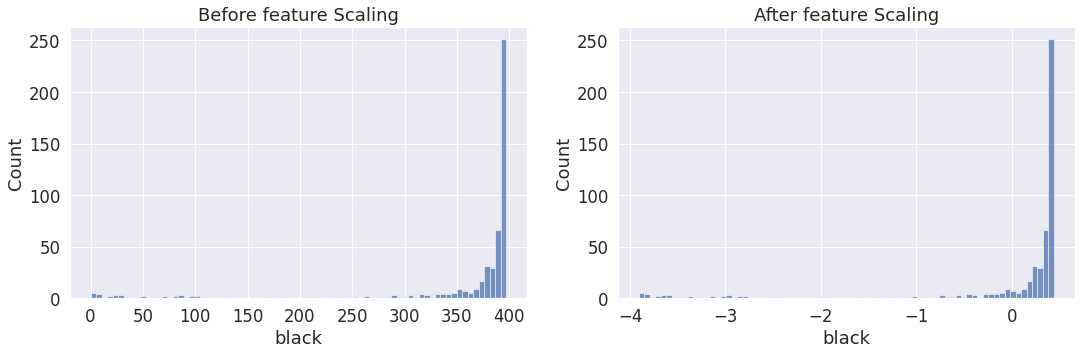

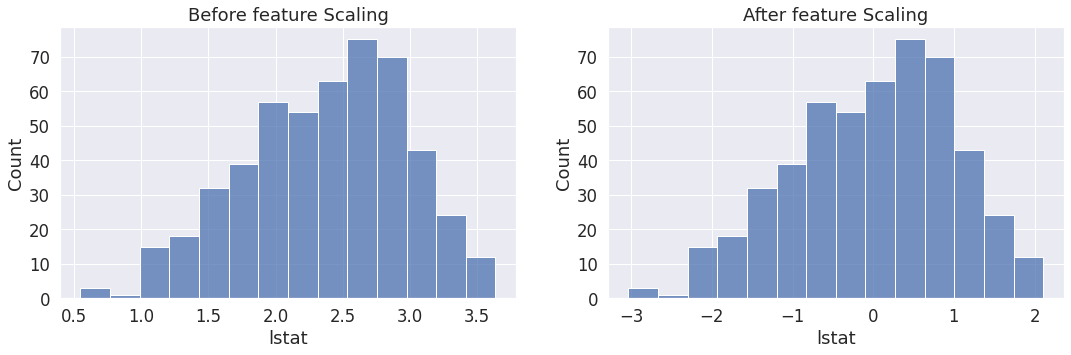

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-2.808469e-17,7.898820e-17,2.106352e-16,-3.510587e-17,-1.965929e-16,-1.088282e-16,-1.474446e-16,-2.808469e-17,2.808469e-17,1.628912e-15,-4.212704e-16,-7.442444e-16,2.808469e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-1.983228e+00,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.978002e+00,-2.136989e+00,-1.768537e+00,-2.707379e+00,-3.907193e+00,-3.036568e+00
25%,-7.963524e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.274599e-01,-5.507826e-01,-7.581113e-01,-4.880391e-01,2.050715e-01,-7.200364e-01
50%,-2.686240e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-4.185330e-02,-2.954604e-01,-3.341425e-01,2.748590e-01,3.811865e-01,9.850402e-02
75%,9.641851e-01,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,8.503817e-01,1.499360e+00,1.439196e+00,8.065758e-01,4.336510e-01,7.656165e-01
max,2.439360e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,2.425471e+00,1.499360e+00,1.604314e+00,1.638828e+00,4.410519e-01,2.108674e+00


In [14]:
sns.set(font_scale=1.5)
for feature in scaled_df.columns:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 5))
    ax1.set_title('Before feature Scaling')
    ax2.set_title('After feature Scaling')
    sns.histplot(data=features,x=feature,ax=ax1)
    sns.histplot(data=scaled_df,x=feature,ax=ax2)    
    plt.show()

scaled_df.describe()

In [15]:
X=scaled_df
Y=target

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.3)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape,sep='\n')

(354, 13)
(354,)
(152, 13)
(152,)


## Linear Regression
Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.

#### Characteristics of Good Residual Plots
A few characteristics of a good residual plot are as follows:
- It has a high density of points close to the origin and a low density of points away from the origin
- It is symmetric about the origin


In [17]:
def train_model(x_train,y_train,x_test,y_test):
    
    lgr=LinearRegression(fit_intercept=True)
    model_lin1=lgr.fit(x_train,y_train)
    price_pred=model_lin1.predict(x_test)

    # RMSE
    lin_rmse1=np.sqrt(mean_squared_error(y_test,price_pred))
    print('RMSE = ',lin_rmse1)

    # R Sq value
    r2_lin_test1=model_lin1.score(x_test,y_test)
    r2_lin_train1=model_lin1.score(x_train,y_train)
    print('\nR Squares Value - \nTest\t\t\tTrain\n',r2_lin_test1,'\t',r2_lin_train1)

    # Regression diagnostics - Residual plot analysis
    residual1=y_test-price_pred

    '''print('\nResidual plot : \n')
    sns.regplot(x=price_pred,y=y_test,scatter=True,fit_reg=True)
    plt.show()'''
    
    print('\nResidual plot analysis : \n')
    sns.regplot(x=price_pred,y=residual1,scatter=True,fit_reg=True)
    plt.show()
    
    return model_lin1,lin_rmse1,r2_lin_test1,r2_lin_train1


RMSE =  5.214975145375403

R Squares Value - 
Test - 0.6733825506400195
Train - 0.7645451026942548

RMSE =  4.720733988842451

R Squares Value - 
Test			Train
 0.7323581921298496 	 0.8164607366754559

Residual plot analysis : 



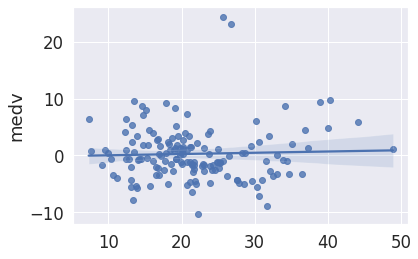

In [18]:
model,rmse,rt_tr,r_ts=train_model(x_train,y_train,x_test,y_test)

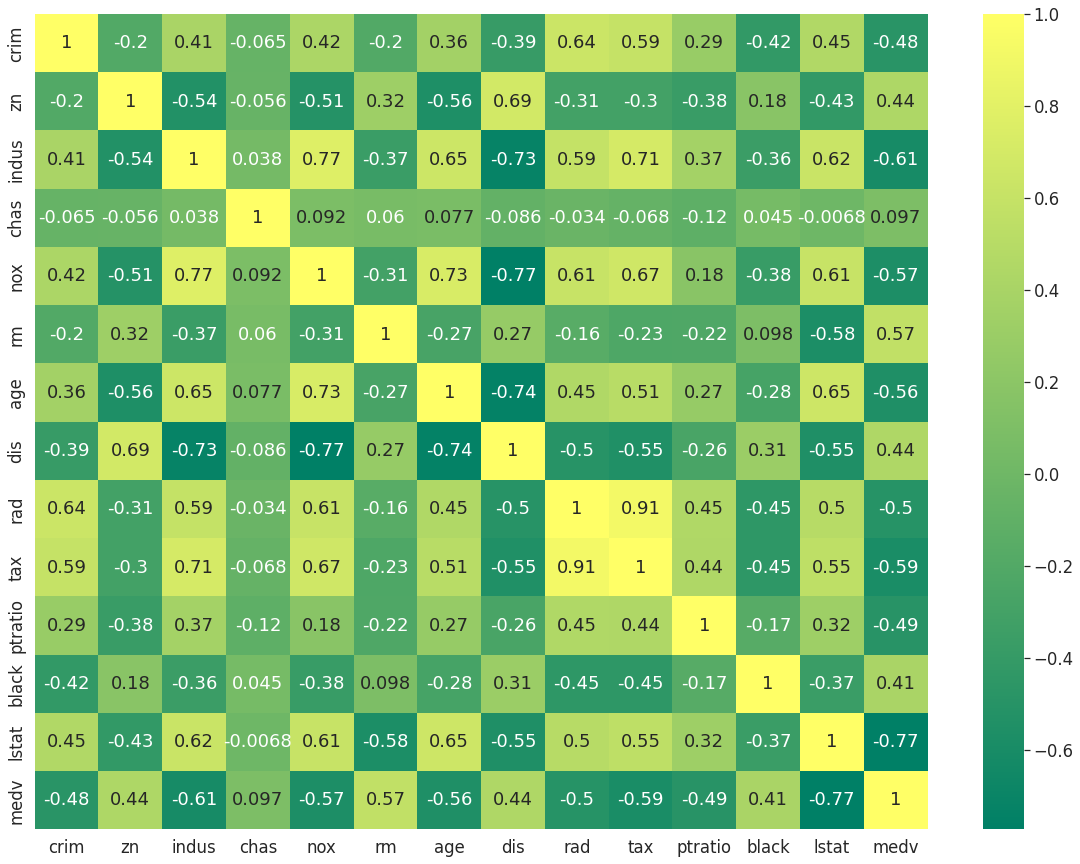

In [19]:
plt.figure(figsize=(20,15))
p=sns.heatmap(new_data.corr(method='pearson'),annot=True,cmap='summer')

In [20]:
X.shape

(506, 13)

In [21]:
new_data=pd.concat([Y,X],axis=1)
new_data.head()

,medv,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
1,24.0,-1.305639,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.769562,-1.343886,-1.117412,-0.303094,0.441052,-0.263711
2,21.6,-1.305978,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.769562,-1.343886,-1.117412,-0.303094,0.396427,-1.627858
3,34.7,-1.226942,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.139194,-0.879950,-1.335255,0.113032,0.416163,-2.153192
4,33.4,-0.876187,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.139194,-0.879950,-1.335255,0.113032,0.441052,-1.162114
5,36.2,-1.264465,-0.487722,-1.306878,-0.272599,-0.835284,0.207096,-0.351157,1.139194,-0.879950,-1.335255,0.113032,0.410571,-1.200048


In [22]:
cor=pd.DataFrame(new_data.corr(method='pearson')['medv'])
cols=list(cor.sort_values('medv').index)
cor.sort_values('medv')

,medv
lstat,-0.626281
ptratio,-0.492149
indus,-0.468259
tax,-0.450146
crim,-0.436869
nox,-0.419545
rad,-0.372115
age,-0.349832
chas,0.193980
dis,0.291745


RMSE =  5.505335004367487

R Squares Value - 
Test			Train
 0.6359991483672307 	 0.77239574758754

Residual plot analysis : 



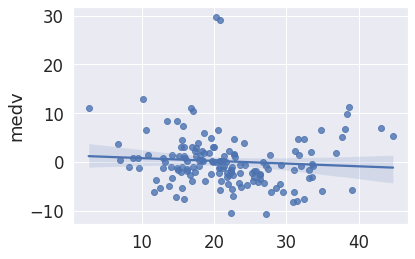

In [28]:
selected_features=['rm','ptratio','tax','lstat']
x_tr=x_train[selected_features]
x_ts=x_test[selected_features]
model3,rmse2,r2test2,r2train2=train_model(x_tr,y_train,x_ts,y_test)


RMSE =  5.287193234923987

R Squares Value - 
Test			Train
 0.6642737778402257 	 0.788383931912547

Residual plot analysis : 



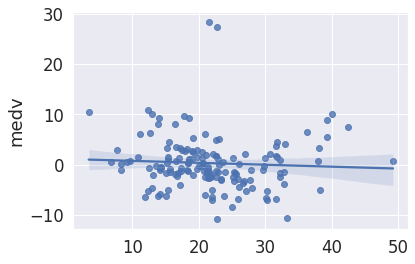

In [29]:
selected_features=['indus','crim','nox','rm','ptratio','tax','lstat','age']
x_tr=x_train[selected_features]
x_ts=x_test[selected_features]
model2,rmse2,r2test2,r2train2=train_model(x_tr,y_train,x_ts,y_test)
